# Data analysis on COVID-19 data from "Protezione Civile"

Import statements.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set the province and region of interest.

In [16]:
# set your province
provincia = 'TV'
# set your region
region = 'Veneto'

## 1. Province analysis

In [17]:
name = 'COVID-19/dati-province/dpc-covid19-ita-province.csv'
df_provincia = pd.read_csv(name)
df_provincia = df_provincia[df_provincia['sigla_provincia'] == provincia]
print(df_provincia.info())
print("min: %s max: %s" % (df_provincia['data'].min(), df_provincia['data'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 123 to 41387
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     295 non-null    object 
 1   stato                    295 non-null    object 
 2   codice_regione           295 non-null    int64  
 3   denominazione_regione    295 non-null    object 
 4   codice_provincia         295 non-null    int64  
 5   denominazione_provincia  295 non-null    object 
 6   sigla_provincia          295 non-null    object 
 7   lat                      295 non-null    float64
 8   long                     295 non-null    float64
 9   totale_casi              295 non-null    int64  
 10  note                     0 non-null      object 
dtypes: float64(2), int64(3), object(6)
memory usage: 27.7+ KB
None
min: 2020-02-24T18:00:00 max: 2020-12-14T17:00:00


Province information: total cases

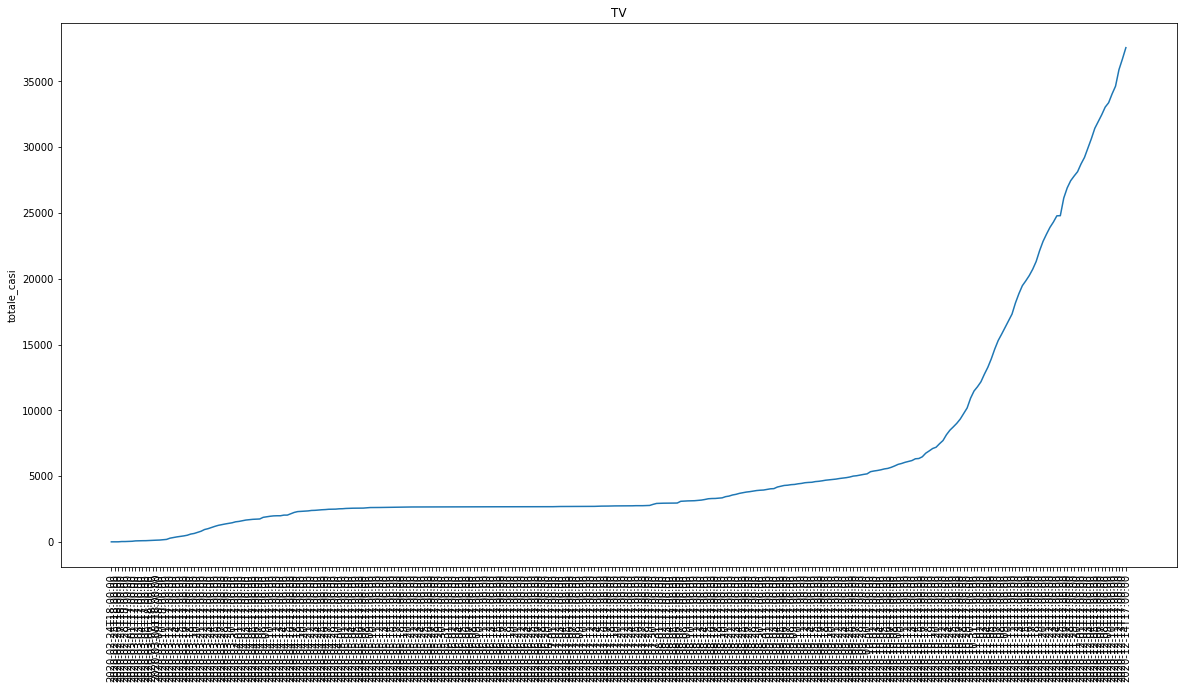

In [18]:
df_provincia = df_provincia[['data','totale_casi']]

plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['totale_casi'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("totale_casi")
plt.show()

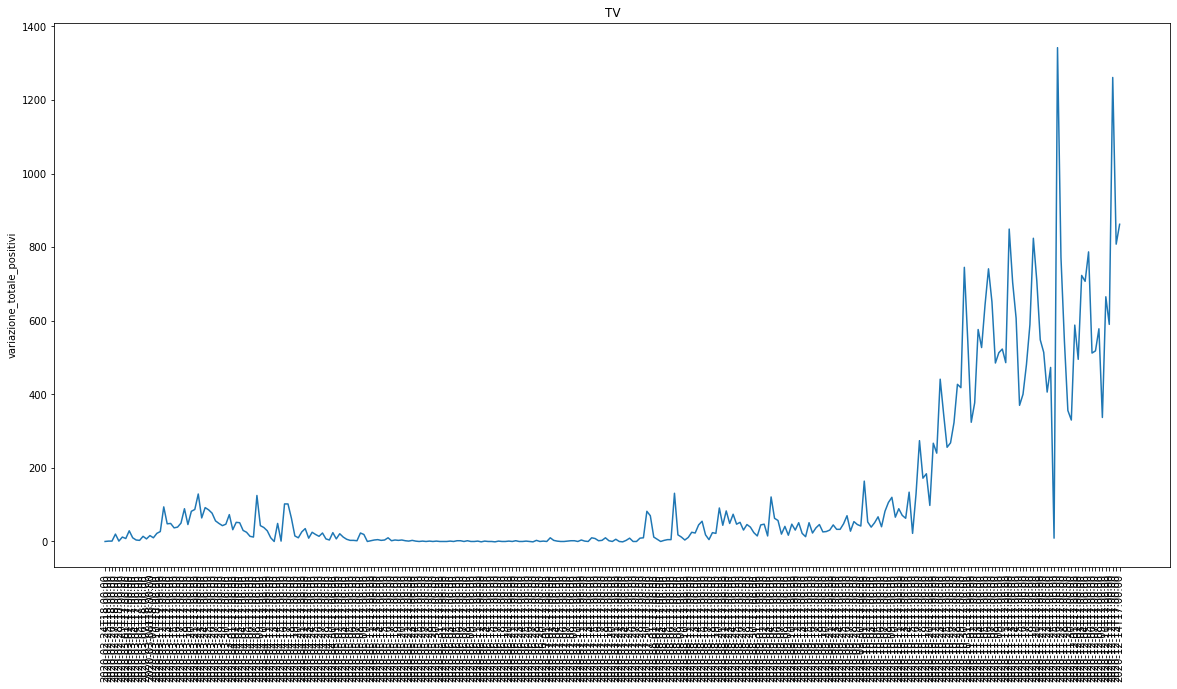

In [19]:
df_provincia['variazione_totale_positivi'] = (df_provincia['totale_casi'] - df_provincia['totale_casi'].shift(1).fillna(0))
plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['variazione_totale_positivi'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("variazione_totale_positivi")
plt.show()

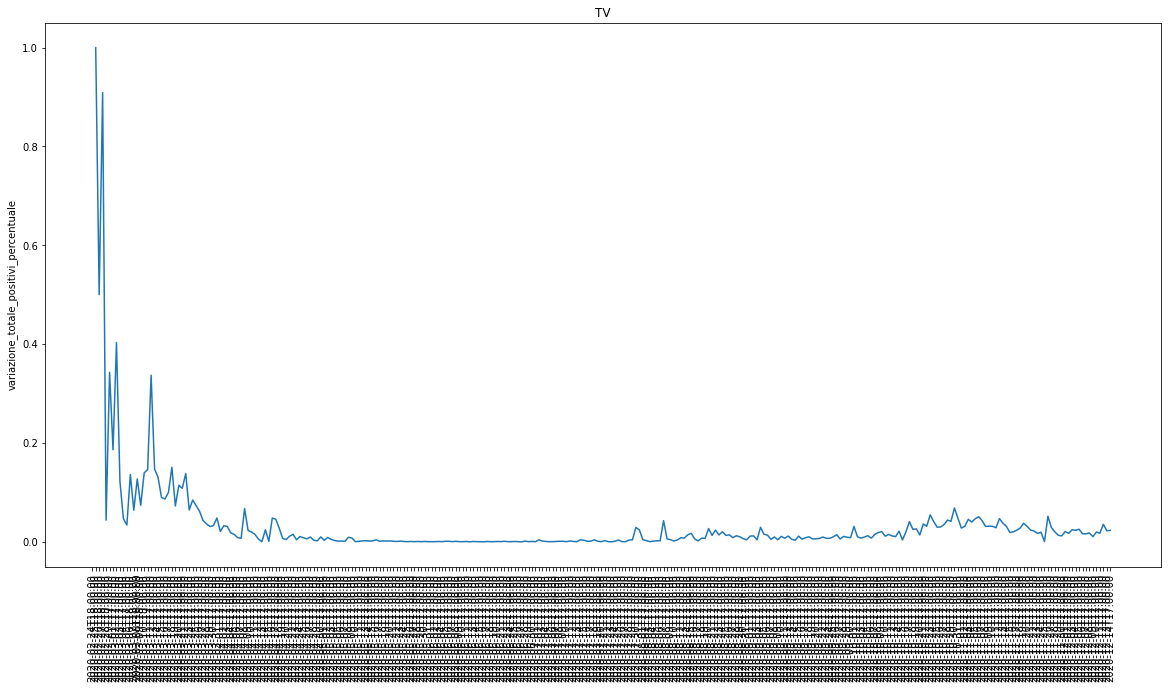

In [20]:
df_provincia['variazione_totale_positivi_percentuale'] = df_provincia['variazione_totale_positivi'] / df_provincia['totale_casi']
plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['variazione_totale_positivi_percentuale'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("variazione_totale_positivi_percentuale")
plt.show()

TODO: Add map by province, more graphs

## 2. Region analysis
Insert the region name below.

In [21]:
name = 'COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv'
df_regioni = pd.read_csv(name)
df_regioni = df_regioni[df_regioni['denominazione_regione'] == region]
print(df_regioni.info())
print("min: %s max: %s" % (df_regioni['data'].min(), df_regioni['data'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 20 to 6194
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          295 non-null    object 
 1   stato                         295 non-null    object 
 2   codice_regione                295 non-null    int64  
 3   denominazione_regione         295 non-null    object 
 4   lat                           295 non-null    float64
 5   long                          295 non-null    float64
 6   ricoverati_con_sintomi        295 non-null    int64  
 7   terapia_intensiva             295 non-null    int64  
 8   totale_ospedalizzati          295 non-null    int64  
 9   isolamento_domiciliare        295 non-null    int64  
 10  totale_positivi               295 non-null    int64  
 11  variazione_totale_positivi    295 non-null    int64  
 12  nuovi_positivi                295 non-null    int64  
 13  dim

Region information.

In [22]:
# ricoverati_con_sintomi, terapia_intensiva, totale_ospedalizzati, isolamento_domiciliare, totale_positivi, variazione_totale_positivi, nuovi_positivi, dimessi_guariti, deceduti, totale_casi, tamponi
columns = ['data','totale_casi','tamponi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_positivi', 'variazione_totale_positivi', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare']
df_regioni = df_regioni[columns]

The larger the organge area, the better.

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


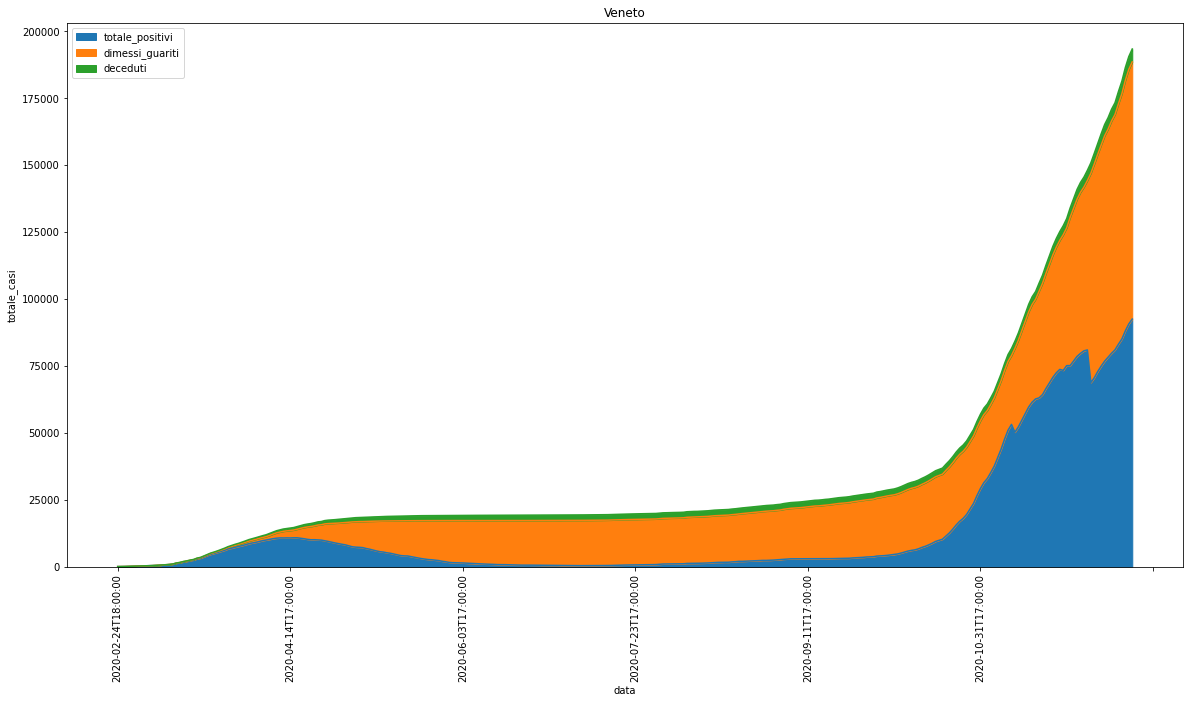

In [23]:
# totale_positivi = totale_casi - (dimessi_guariti + deceduti)
# totale_casi = totale_positivi + dimessi_guaridi + deceduti
df_positivi = df_regioni[['data', 'totale_positivi', 'dimessi_guariti', 'deceduti']]
df_positivi = df_positivi.set_index('data')
df_positivi.plot(kind='area', figsize=(20,10))
plt.ylabel("totale_casi")
plt.xticks(rotation=90)
plt.title(region)
plt.show()

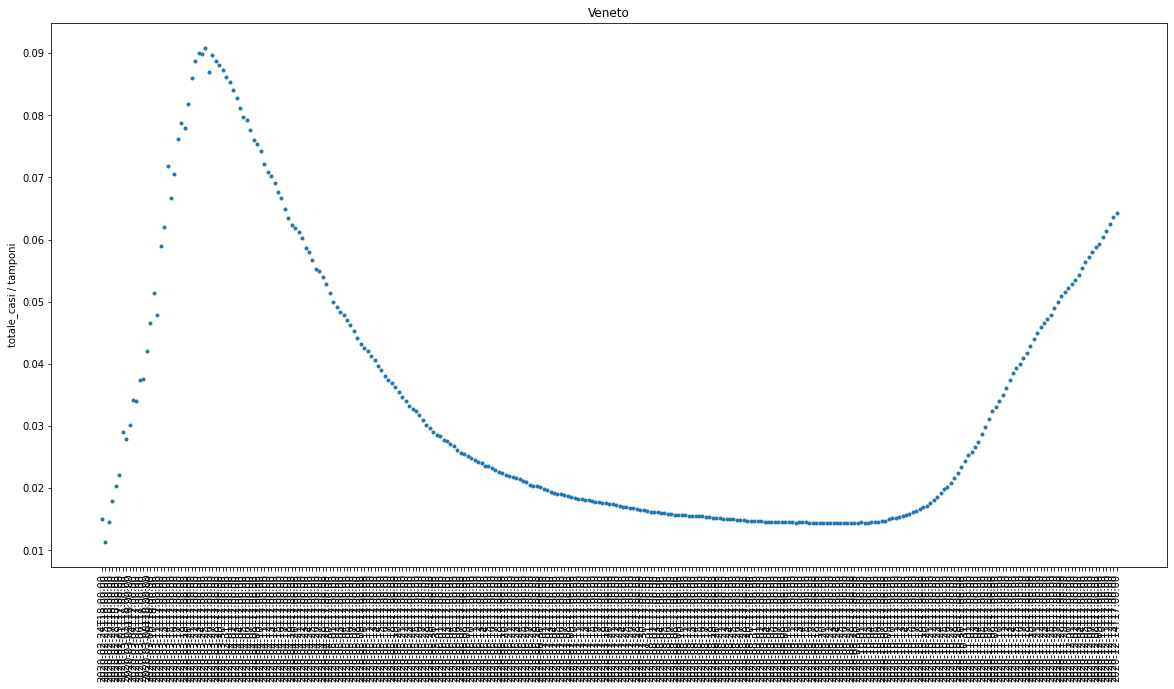

In [24]:
plt.figure(figsize=(20,10))
# df_tamponi = df_regioni[['totale_casi', 'tamponi']]
plt.plot(df_regioni['data'],df_regioni['totale_casi']/df_regioni['tamponi'],'.')
plt.xticks(rotation=90)
plt.title(region)
plt.ylabel("totale_casi / tamponi")
plt.show()

In [25]:
print(df_regioni['tamponi'][1:], df_regioni['tamponi'])

41         3780
62         4900
83         6164
104        7414
125        8659
         ...   
6110    2941145
6131    2957445
6152    2981631
6173    2997581
6194    3006809
Name: tamponi, Length: 294, dtype: int64 20         2200
41         3780
62         4900
83         6164
104        7414
         ...   
6110    2941145
6131    2957445
6152    2981631
6173    2997581
6194    3006809
Name: tamponi, Length: 295, dtype: int64


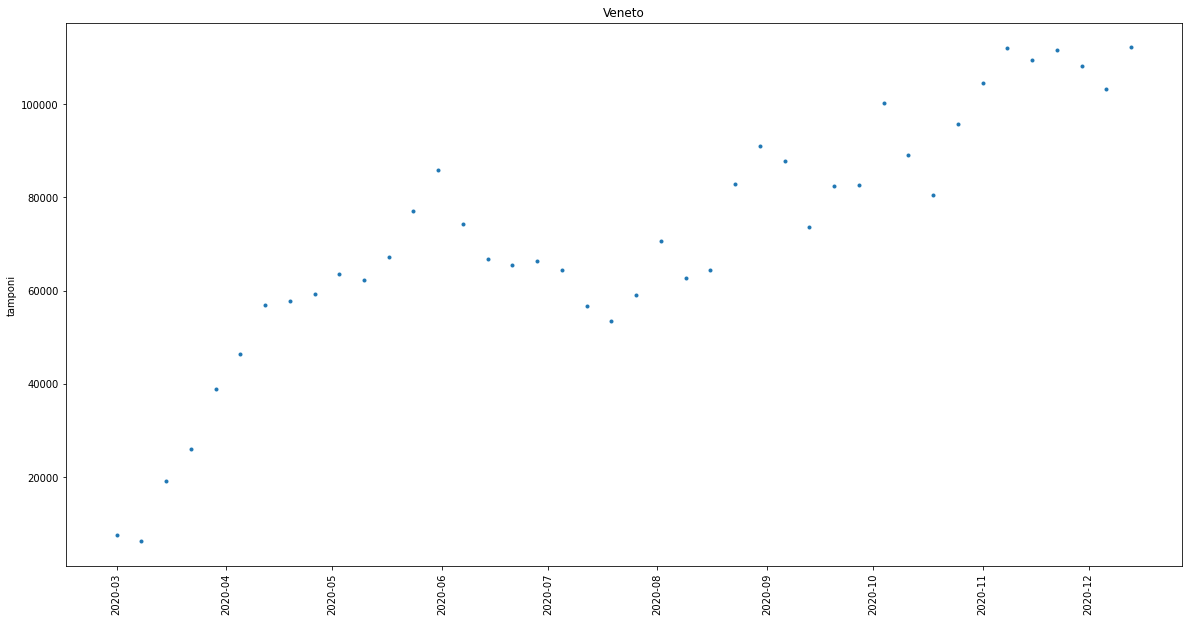

In [52]:
plt.figure(figsize=(20,10))
tamponi = df_regioni['tamponi'] - np.roll(df_regioni['tamponi'],1)
tamponi[20] = 0
df_regioni['tamponi_diff'] = np.diff(np.append(df_regioni['tamponi'],0))
pd.to_datetime(df_regioni['data'])
df_week = df_regioni.resample('W',on='data').sum()
plt.plot(df_week['tamponi_diff'][:-1],'.')
plt.xticks(rotation=90)
plt.title(region)
plt.ylabel("tamponi")
plt.show()

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


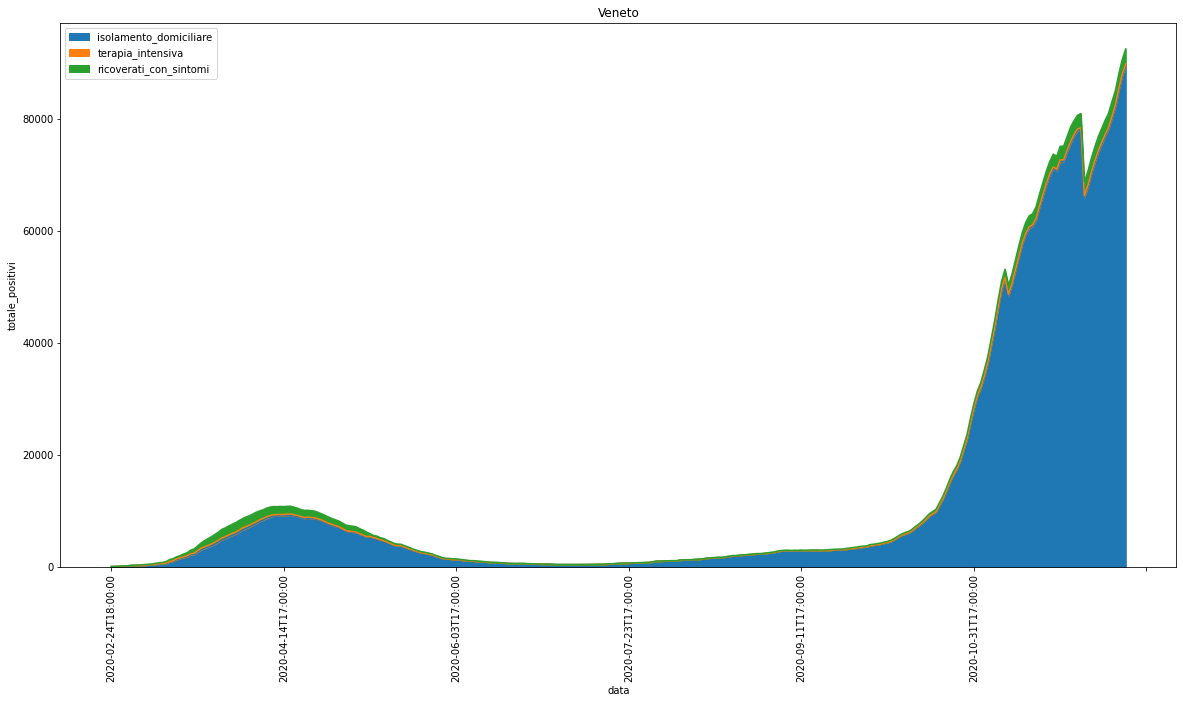

In [27]:
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# totale_ospedalizzati = terapia_intensiva + ricoverati_con_sintomi
df_hospital = df_regioni[['data', 'isolamento_domiciliare', 'terapia_intensiva', 'ricoverati_con_sintomi']]
df_hospital = df_hospital.set_index('data')
df_hospital.plot(kind='area', figsize=(20,10))
plt.ylabel("totale_positivi")
plt.xticks(rotation=90)
plt.title(region)
plt.show()

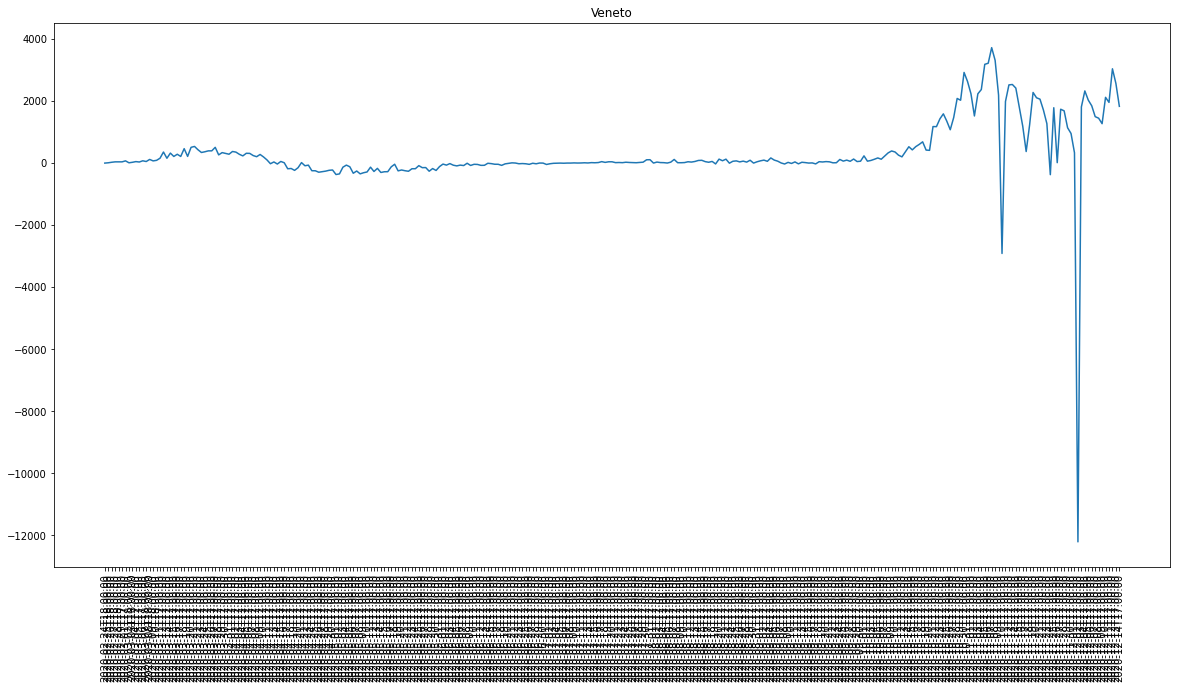

In [28]:
# Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente)
plt.figure(figsize=(20,10))
plt.plot(df_regioni['data'],df_regioni['variazione_totale_positivi'])
plt.xticks(rotation=90)
plt.title(region)
plt.show()